# Capstone Project: PAK DE (Parkinson Detection)

Dataset yang digunakan adalah 2 dataset yang digabungkan, dimana ada 3 jenis kelas setelah dilakukan penggabungan dataset yaitu `spiral`, `wave`, dan `meander`.


**Source:** [HandPD dataset](https://wwwp.fc.unesp.br/~papa/pub/datasets/Handpd/) dan [Hand Drawings](https://data.mendeley.com/datasets/fd5wd6wmdj/1)

## Install Module

In [ ]:
%pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.5 MB/s eta 0:00:00


In [ ]:
%pip install mlflow

## Tahap 1: Konfigurasi Dasar dan Pemuatan Data Awal

**TAHAP 1: Konfigurasi Dasar dan Pemuatan Data Awal**

Pada tahapan ini, kita akan melakukan persiapan awal yang menjadi fondasi bagi keseluruhan proyek. Langkah-langkah yang dilakukan meliputi **impor library** yang dibutuhkan, **konfigurasi variabel global** seperti ukuran gambar dan `SEED` untuk reproduktifitas, serta **menghubungkan notebook dengan Google Drive** untuk mengakses dataset.

Selanjutnya, kita akan melakukan **ekstraksi dataset** dari file `.zip` (jika diperlukan) dan kemudian secara sistematis **mengumpulkan path dari semua file gambar** yang ada. Informasi ini, beserta label awal yang diekstrak dari struktur folder, akan disusun ke dalam sebuah **DataFrame Pandas**. DataFrame ini akan menjadi dasar untuk tahap eksplorasi data selanjutnya.

### Import Library

In [ ]:
# --- Libraries untuk Operasi Dasar dan Sistem File ---
import os  # Untuk berinteraksi dengan sistem operasi, seperti path, direktori
import pathlib  # Untuk bekerja dengan path file dan direktori secara object-oriented (tidak digunakan secara eksplisit di kode yang Anda berikan, tapi umum)
import random  # Untuk menghasilkan angka acak (tidak digunakan secara eksplisit, tapi bisa berguna)
import shutil  # Untuk operasi file tingkat tinggi seperti menyalin dan menghapus folder
import zipfile # Untuk bekerja dengan file ZIP (tidak digunakan secara eksplisit karena Anda menggunakan !unzip)

# --- Libraries untuk Manipulasi Data dan Numerik ---
import numpy as np  # Fundamental package untuk komputasi numerik, terutama array multidimensi
import pandas as pd  # Untuk analisis dan manipulasi data, terutama struktur data seperti DataFrame
from tqdm.notebook import tqdm as tq  # Untuk menampilkan progress bar yang interaktif di notebook Jupyter/Colab

# --- Libraries Spesifik Google Colab ---
# from google.colab import files # Untuk upload/download file di Colab (tidak digunakan di kode terakhir)
from google.colab import drive # Untuk me-mount Google Drive di Colab

# --- Libraries untuk Visualisasi Data ---
# %matplotlib inline # Magic command Jupyter untuk menampilkan plot matplotlib secara inline
import matplotlib.pyplot as plt  # Library utama untuk membuat plot dan visualisasi statis, animasi, dan interaktif
import seaborn as sns  # Library visualisasi data berbasis matplotlib, menyediakan antarmuka tingkat tinggi untuk grafik statistik yang menarik

# --- Libraries untuk Pemrosesan Gambar dan Machine Learning ---
from PIL import Image  # Python Imaging Library (Pillow fork) untuk membuka, memanipulasi, dan menyimpan berbagai format file gambar
from collections import Counter # Untuk menghitung frekuensi item dalam sebuah list (digunakan untuk mengecek channel warna)

# --- TensorFlow dan Keras (untuk Deep Learning) ---
import tensorflow as tf  # Platform open-source end-to-end untuk machine learning
from tensorflow.keras.applications import MobileNetV2  # Model MobileNetV2 yang sudah terlatih (pre-trained) untuk transfer learning
from tensorflow.keras import layers, models, callbacks, optimizers  # Komponen-komponen untuk membangun dan melatih model Keras:
                                                                  # layers: Blok bangunan model (Dense, Dropout, Conv2D, dll.)
                                                                  # models: API untuk membuat model (Sequential, Functional)
                                                                  # callbacks: Fungsi yang dipanggil selama pelatihan (EarlyStopping, ReduceLROnPlateau)
                                                                  # optimizers: Algoritma untuk mengoptimalkan model (Adam, SGD)
from tensorflow.keras.regularizers import l2  # Untuk menerapkan regularisasi L2 (weight decay) pada bobot layer
from tensorflow.keras.preprocessing import image # Utilitas untuk preprocessing gambar sebelum dimasukkan ke model Keras (misalnya, load_img, img_to_array)

# --- Scikit-learn (untuk utilitas Machine Learning) ---
from sklearn.model_selection import train_test_split  # Untuk membagi dataset menjadi set latih dan tes (atau validasi)
from sklearn.utils import class_weight  # Untuk menghitung bobot kelas guna menangani dataset yang tidak seimbang
from sklearn.metrics import confusion_matrix, classification_report  # Untuk mengevaluasi performa model klasifikasi

# --- MLflow (untuk Manajemen Eksperimen Machine Learning) ---
import mlflow  # Platform open-source untuk mengelola siklus hidup machine learning, termasuk pelacakan eksperimen
import mlflow.tensorflow  # Modul MLflow untuk integrasi dengan TensorFlow/Keras

# --- Lain-lain ---
import tempfile  # Untuk membuat file dan direktori sementara

# --- Mengabaikan Peringatan untuk output yang lebih bersih ---
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [ ]:
# Mount Google Drive (hanya jika menggunakan Colab)
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


### Konfigurasi Dasar

In [ ]:
# Konfigurasi Dasar
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
SEED = 42
AUTOTUNE = tf.data.AUTOTUNE

### Data Loading

In [ ]:
# Path ke folder dataset di Google Drive
drive_path = '/content/drive/MyDrive/'
project_folder = 'parkinson' # Nama folder proyek di Drive
dataset_name_zip = 'parkinson_dataset.zip' # Nama file zip
extracted_dataset_folder_name = 'parkinson_dataset' # Nama folder setelah diekstrak

dataset_base_path = os.path.join(drive_path, project_folder)
zip_file_path = os.path.join(dataset_base_path, dataset_name_zip)
dataset_dir = os.path.join(dataset_base_path, extracted_dataset_folder_name) # Path ke folder dataset yang sudah diekstrak
base_path_split = os.path.join(dataset_base_path, 'split_data') # Path untuk menyimpan data yang sudah di-split

In [ ]:
# Direktori tujuan untuk mengesktrak isi zip
if not os.path.exists(dataset_dir):
    print(f"Mengekstrak: '{zip_file_path}' ke '{dataset_base_path}'")
    if os.path.exists(zip_file_path):
        # Perintah unzip untuk Colab
        !unzip -q "{zip_file_path}" -d "{dataset_base_path}"
        print(f"File '{dataset_name_zip}' berhasil diekstrak ke: {dataset_base_path}")
    else:
        print(f"File ZIP '{dataset_name_zip}' tidak ditemukan di: {zip_file_path}")
else:
    print(f"Folder dataset '{dataset_dir}' sudah ada.")

Folder dataset '/content/drive/MyDrive/parkinson/parkinson_dataset' sudah ada.


### 1.1. Mengumpulkan Path Gambar dan Label Awal untuk EDA

In [ ]:
all_file_paths_eda = []
all_labels_initial_eda = []
all_labels_main_eda = []
image_modes_eda = []
image_sizes_eda = {}

sub_folders = ['meander', 'spiral', 'wave']
categories = ['healthy', 'parkinson']

for sub_folder in sub_folders:
    image_sizes_eda[sub_folder] = {'healthy': [], 'parkinson': []}
    for category in categories:
        folder_path = os.path.join(dataset_dir, sub_folder, category)
        if os.path.exists(folder_path) and os.path.isdir(folder_path):
            for filename in os.listdir(folder_path):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')) and not filename.startswith('.'): # Hindari file tersembunyi
                    img_path = os.path.join(folder_path, filename)
                    all_file_paths_eda.append(img_path)
                    all_labels_initial_eda.append(f"{category} ({sub_folder})")
                    all_labels_main_eda.append(category)
                    try:
                        with Image.open(img_path) as img:
                            image_modes_eda.append(img.mode)
                            image_sizes_eda[sub_folder][category].append(img.size)
                    except Exception as e:
                        print(f"Gagal membaca info gambar {img_path}: {e}")
        else:
            print(f"Folder tidak ditemukan atau bukan direktori: {folder_path}")

if not all_file_paths_eda:
    raise ValueError("Tidak ada file gambar yang ditemukan untuk EDA. Periksa path dataset_dir dan struktur folder.")

df_eda = pd.DataFrame({
    "path": all_file_paths_eda,
    "labels_initial": all_labels_initial_eda,
    "labels_main": all_labels_main_eda
})
print(f"Total gambar ditemukan untuk EDA: {len(df_eda)}")

Total gambar ditemukan untuk EDA: 940


## Tahap 2: Exploratory Data Analysis (EDA)

**TAHAP 2: Eksplorasi Data Awal (EDA)**

Pada tahapan ini, dilakukan **eksplorasi data awal (EDA)** untuk memahami karakteristik dan distribusi dataset sebelum masuk ke pemodelan. Tujuannya adalah untuk mendapatkan wawasan dari data mentah. Beberapa analisis yang dilakukan antara lain:
- **Visualisasi Sampel Gambar:** Menampilkan beberapa contoh gambar dari setiap kategori (`healthy`, `parkinson`) dan jenis (`spiral`, `wave`, `meander`) untuk melihat variasi visual dalam data.
- **Analisis Distribusi Kelas:** Membuat plot untuk menghitung dan memvisualisasikan jumlah gambar per kelas. Ini penting untuk mengidentifikasi adanya ketidakseimbangan kelas (class imbalance) yang mungkin perlu ditangani.
- **Pengecekan Properti Gambar:** Menganalisis properti teknis gambar seperti mode warna (misalnya, RGB, RGBA) dan variasi resolusi untuk memastikan konsistensi data sebelum diproses lebih lanjut.

### EDA 2.1. Sampel Gambar untuk Semua Kelas dan Jenis

Untuk memahami seperti apa variasi visual dari tiap kelas  (healthy vs parkinson) dalam jenis gambar (spiral, wave, meander).

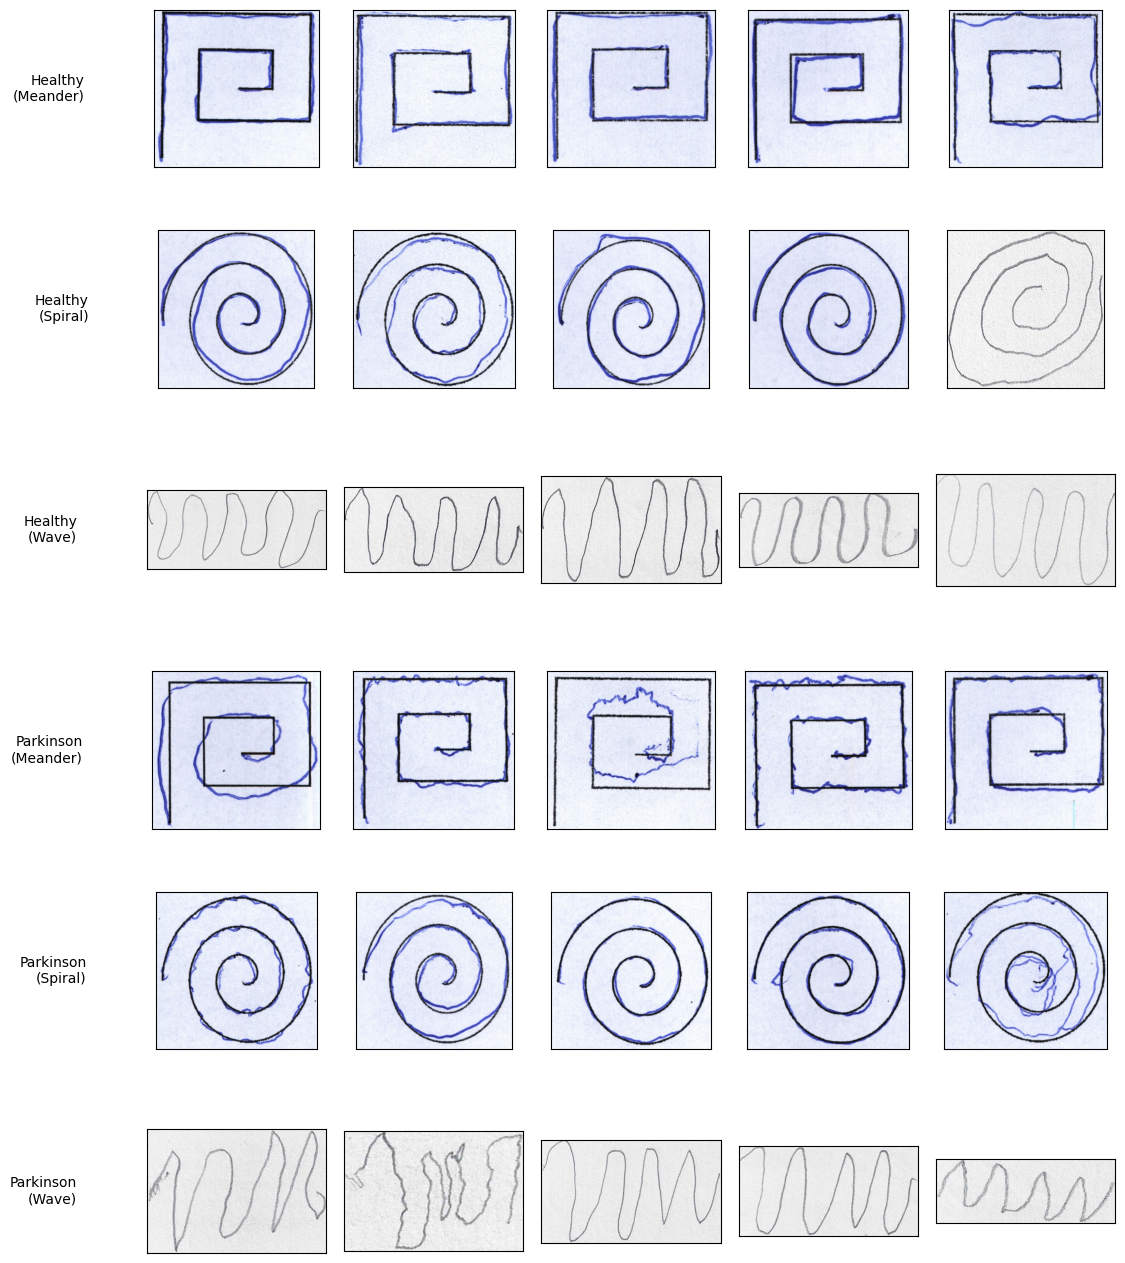

In [ ]:
num_samples_to_display = 5
all_images_by_category_plot = {}
for sub_folder in sub_folders:
    for category in categories:
        folder_path = os.path.join(dataset_dir, sub_folder, category)
        if os.path.exists(folder_path) and os.path.isdir(folder_path):
            image_files = [
                f for f in os.listdir(folder_path)
                if os.path.isfile(os.path.join(folder_path, f)) and f.lower().endswith(('.png', '.jpg', '.jpeg'))
            ]
            if image_files:
                key_name = f"{category.capitalize()}\n({sub_folder.capitalize()})"
                all_images_by_category_plot[key_name] = [os.path.join(folder_path, fname) for fname in image_files]

sorted_categories_plot = sorted(all_images_by_category_plot.keys())
num_categories_to_plot = len(sorted_categories_plot)

if num_categories_to_plot > 0:
    fig, axs = plt.subplots(num_categories_to_plot, num_samples_to_display,
                            figsize=(num_samples_to_display * 2.5, num_categories_to_plot * 2.5))
    if num_categories_to_plot == 1: axs = np.array([axs])
    if num_samples_to_display == 1 and num_categories_to_plot > 1: axs = axs.reshape(-1, 1)
    elif num_samples_to_display == 1 and num_categories_to_plot == 1: axs = np.array([[axs]])

    for i, category_name in enumerate(sorted_categories_plot):
        image_paths_list = all_images_by_category_plot[category_name]
        if image_paths_list:
            selected_image_paths = np.random.choice(image_paths_list,
                                                    min(num_samples_to_display, len(image_paths_list)),
                                                    replace=False)
            if num_samples_to_display > 0 :
                axs[i, 0].set_ylabel(category_name, rotation=0, size='medium', labelpad=50, ha='right', va='center')
            for j in range(num_samples_to_display):
                if j < len(selected_image_paths):
                    img_path_plot = selected_image_paths[j]
                    try:
                        img_plot = Image.open(img_path_plot).convert('RGB')
                        axs[i, j].imshow(img_plot)
                    except Exception: axs[i, j].set_title("Error", fontsize=8)
                else: axs[i,j].text(0.5, 0.5, 'N/A', ha='center', va='center', fontsize=10)
                axs[i,j].set_xticks([]); axs[i,j].set_yticks([]); axs[i,j].set_xlabel('')
        else:
            if num_samples_to_display > 0: axs[i, 0].set_ylabel(category_name, rotation=0, size='medium', labelpad=50, ha='right', va='center')
            for j in range(num_samples_to_display): axs[i,j].text(0.5, 0.5, 'No Images', ha='center', va='center', fontsize=10); axs[i,j].set_xticks([]); axs[i,j].set_yticks([]); axs[i,j].set_xlabel('')
    plt.subplots_adjust(hspace=0.4, wspace=0.1, top=0.95); plt.show()
else:
    print("Tidak ada data gambar untuk sampel EDA.")

### EDA 2.2. Distribusi Gambar per Kelas Utama (Healthy vs Parkinson)

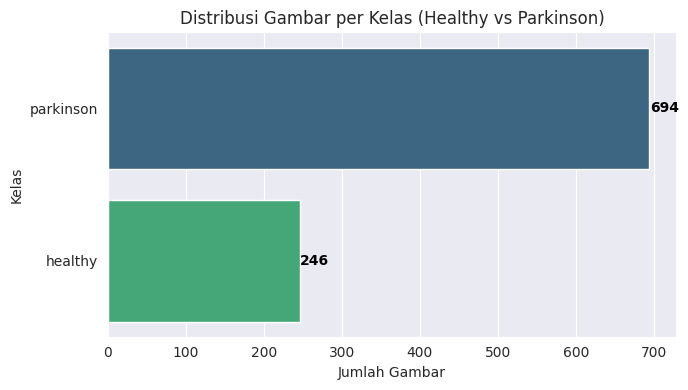


Jumlah Gambar per Kelas (Healthy vs Parkinson):
 labels_main
parkinson    694
healthy      246
Name: count, dtype: int64


In [ ]:
label_counts_main_eda = df_eda['labels_main'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(7, 4))
sns.set_style("darkgrid")
ax = sns.countplot(y='labels_main', data=df_eda, order=label_counts_main_eda.index, palette="viridis")
plt.title('Distribusi Gambar per Kelas (Healthy vs Parkinson)')
plt.xlabel('Jumlah Gambar'); plt.ylabel('Kelas')
for i, v in enumerate(label_counts_main_eda): ax.text(v + 0.5, i, str(v), color='black', va='center', fontweight='bold')
plt.tight_layout(); plt.show()
print("\nJumlah Gambar per Kelas (Healthy vs Parkinson):\n", label_counts_main_eda)

### EDA 2.3. Distribusi Gambar per Kelas dan Jenis

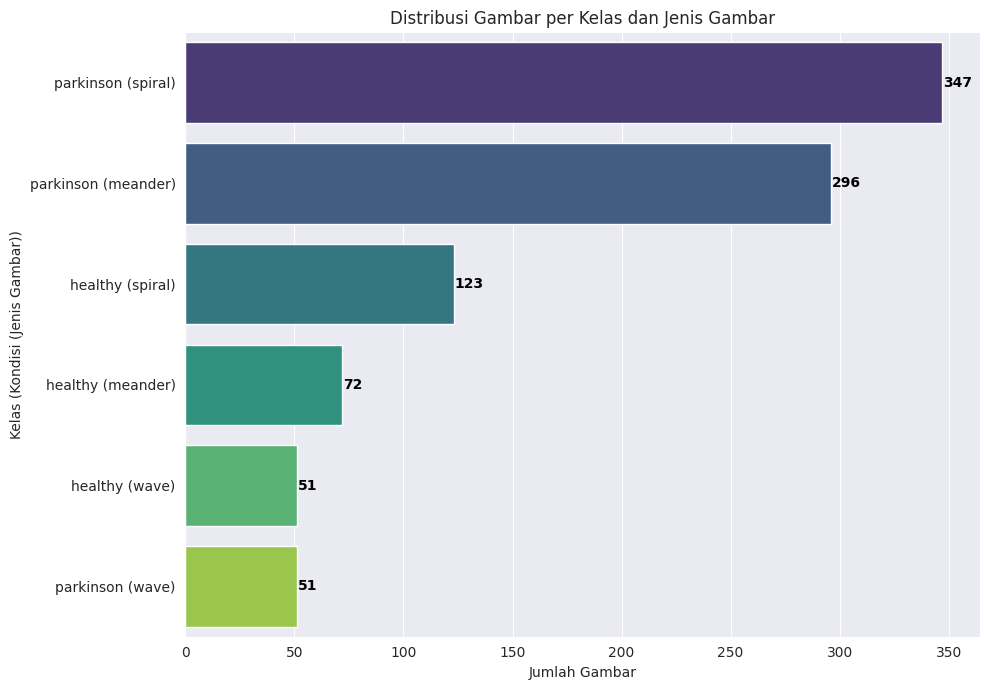


Jumlah Gambar per Kelas dan Jenis:
 labels_initial
parkinson (spiral)     347
parkinson (meander)    296
healthy (spiral)       123
healthy (meander)       72
healthy (wave)          51
parkinson (wave)        51
Name: count, dtype: int64


In [ ]:
label_counts_detailed_eda = df_eda['labels_initial'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10, 7))
n_labels_detailed_eda = len(label_counts_detailed_eda)
if n_labels_detailed_eda > 0:
    palette_detailed_eda = sns.color_palette("viridis", n_colors=n_labels_detailed_eda)
    sns.set_style("darkgrid")
    ax = sns.countplot(y='labels_initial', data=df_eda, order=label_counts_detailed_eda.index, palette=palette_detailed_eda)
    plt.title('Distribusi Gambar per Kelas dan Jenis Gambar')
    plt.xlabel('Jumlah Gambar'); plt.ylabel('Kelas (Kondisi (Jenis Gambar))')
    for i, v in enumerate(label_counts_detailed_eda): ax.text(v + 0.5, i, str(v), color='black', va='center', fontweight='bold')
    plt.tight_layout(); plt.show()
    print("\nJumlah Gambar per Kelas dan Jenis:\n", label_counts_detailed_eda)
else:
    print("Tidak ada label_initial di df_eda.")

### EDA 2.4. Pengecekan Ukuran Gambar

In [ ]:
for sub_folder_key, categories_data in image_sizes_eda.items():
    for category_key, sizes_list in categories_data.items():
        if sizes_list:
            unique_sizes = set(sizes_list)
            print(f"Ukuran gambar unik untuk ('{sub_folder_key}', '{category_key}'): {len(unique_sizes)}")
            if len(unique_sizes) < 10: print(f"   Contoh ukuran: {list(unique_sizes)[:5]}")
        else:
            print(f"Tidak ada ukuran gambar untuk ('{sub_folder_key}', '{category_key}')")

Ukuran gambar unik untuk ('meander', 'healthy'): 70
Ukuran gambar unik untuk ('meander', 'parkinson'): 280
Ukuran gambar unik untuk ('spiral', 'healthy'): 72
Ukuran gambar unik untuk ('spiral', 'parkinson'): 256
Ukuran gambar unik untuk ('wave', 'healthy'): 31
Ukuran gambar unik untuk ('wave', 'parkinson'): 43


### 2.5. Pengecekan Format Warna

In [ ]:
mode_counts_original = Counter(image_modes_eda)
print("Distribusi mode gambar asli dalam dataset:", mode_counts_original)
if 'RGBA' in mode_counts_original or 'P' in mode_counts_original or 'L' in mode_counts_original:
    print("Catatan: Ada gambar dengan mode selain RGB. TensorFlow akan mengonversinya ke RGB jika color_mode='rgb'.")

Distribusi mode gambar asli dalam dataset: Counter({'RGB': 931, 'RGBA': 9})
Catatan: Ada gambar dengan mode selain RGB. TensorFlow akan mengonversinya ke RGB jika color_mode='rgb'.


## Tahap 3: Preprocessing Data untuk Model

**TAHAP 3: Preprocessing Data untuk Model**

Pada tahapan ini, data mentah yang telah kita eksplorasi akan disiapkan dan diubah menjadi format yang optimal untuk dilatih oleh model *deep learning*. Proses ini meliputi:
- **Pembagian Data:** Dataset dibagi menjadi tiga set: **Training**, **Validation**, dan **Test** secara terstratifikasi untuk menjaga proporsi kelas.
- **Organisasi Direktori:** Gambar-gambar disalin ke dalam struktur direktori baru (`train/`, `val/`, `test/`) yang sesuai dengan format yang dibutuhkan oleh TensorFlow.
- **Augmentasi Data:** Teknik augmentasi seperti rotasi, zoom, dan flip diterapkan **hanya pada data training** untuk memperbanyak variasi data secara artifisial. Ini membantu model untuk generalisasi lebih baik dan mengurangi risiko *overfitting*.
- **Preprocessing Spesifik Model:** Setiap gambar (baik yang asli maupun yang sudah diaugmentasi) melalui fungsi `preprocess_input` dari MobileNetV2, yang menormalisasi nilai piksel gambar agar sesuai dengan yang diharapkan oleh model *pre-trained*.
- **Pembuatan Pipeline `tf.data`:** Data diubah menjadi objek `tf.data.Dataset` yang efisien, dengan `prefetch` untuk mengoptimalkan kecepatan pemuatan data selama pelatihan.

### 3.1. Pembagian Data (Menggunakan DataFrame dari EDA)

In [ ]:
labels_for_split = df_eda['labels_main']
main_df, test_df = train_test_split(df_eda, test_size=0.1, stratify=labels_for_split, random_state=SEED)
train_labels_for_stratify_val = main_df['labels_main']
train_df, val_df = train_test_split(main_df, test_size=0.2, stratify=train_labels_for_stratify_val, random_state=SEED)
print(f"Data latih (df): {len(train_df)}, Validasi (df): {len(val_df)}, Tes (df): {len(test_df)}")

Data latih (df): 676, Validasi (df): 170, Tes (df): 94


### 3.2. Menyalin Gambar ke Folder Split

In [ ]:
if os.path.exists(base_path_split):
    print(f"Menghapus folder split_data lama: {base_path_split}")
    shutil.rmtree(base_path_split)
os.makedirs(base_path_split, exist_ok=True)

def copy_images_for_tf_dataset(df_to_copy, split_name_arg, base_path_split_arg): # Ganti nama parameter df
    print(f"Menyalin gambar untuk set {split_name_arg}...")
    for _, row in df_to_copy.iterrows():
        label_folder = row['labels_main']
        dst_dir = os.path.join(base_path_split_arg, split_name_arg, label_folder)
        os.makedirs(dst_dir, exist_ok=True)
        try:
            shutil.copy(row['path'], os.path.join(dst_dir, os.path.basename(row['path'])))
        except Exception as e:
            print(f"Error menyalin {row['path']} ke {dst_dir}: {e}")
    print(f"Selesai menyalin untuk set {split_name_arg}.")

copy_images_for_tf_dataset(train_df, "train", base_path_split)
copy_images_for_tf_dataset(val_df, "val", base_path_split)
copy_images_for_tf_dataset(test_df, "test", base_path_split)

Menghapus folder split_data lama: /content/drive/MyDrive/parkinson/split_data
Menyalin gambar untuk set train...
Selesai menyalin untuk set train.
Menyalin gambar untuk set val...
Selesai menyalin untuk set val.
Menyalin gambar untuk set test...
Selesai menyalin untuk set test.


### 3.3. Load Dataset dengan `tf.data.image_dataset_from_directory`

In [ ]:
train_path = os.path.join(base_path_split, 'train')
val_path = os.path.join(base_path_split, 'val')
test_path = os.path.join(base_path_split, 'test')

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_path, labels='inferred', label_mode='int', image_size=IMG_SIZE,
    batch_size=BATCH_SIZE, seed=SEED, shuffle=True, color_mode='rgb'
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    val_path, labels='inferred', label_mode='int', image_size=IMG_SIZE,
    batch_size=BATCH_SIZE, seed=SEED, shuffle=False, color_mode='rgb'
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_path, labels='inferred', label_mode='int', image_size=IMG_SIZE,
    batch_size=BATCH_SIZE, seed=SEED, shuffle=False, color_mode='rgb'
)
class_names_from_tf = train_ds.class_names
print(f"Nama kelas ditemukan oleh TensorFlow: {class_names_from_tf}")

Found 676 files belonging to 2 classes.
Found 170 files belonging to 2 classes.
Found 94 files belonging to 2 classes.
Nama kelas ditemukan oleh TensorFlow: ['healthy', 'parkinson']


### 3.4. Hitung Class Weight

In [ ]:
train_labels_for_weights = np.concatenate([y for x, y in train_ds], axis=0)
class_weights_values = class_weight.compute_class_weight(
    class_weight='balanced', classes=np.unique(train_labels_for_weights), y=train_labels_for_weights
)
class_map = {name: i for i, name in enumerate(class_names_from_tf)}
class_weight_dict = {
    class_map.get('healthy', 0): class_weights_values[class_map.get('healthy', 0)],
    class_map.get('parkinson', 1): class_weights_values[class_map.get('parkinson', 1)]
}
print(f"Class names dari train_ds: {class_names_from_tf} -> Mapping: {class_map}")
print("Calculated Class Weights:", class_weight_dict)

Class names dari train_ds: ['healthy', 'parkinson'] -> Mapping: {'healthy': 0, 'parkinson': 1}
Calculated Class Weights: {0: np.float64(1.9096045197740112), 1: np.float64(0.6773547094188377)}


### 3.5. Augmentasi Data dan Preprocessing Pipeline untuk Model

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip('horizontal'),
        tf.keras.layers.RandomRotation(0.15),
        tf.keras.layers.RandomZoom(0.1),
        tf.keras.layers.RandomContrast(0.1)
    ], name="data_augmentation"
)

def apply_augmentation(image, label):
    image = tf.cast(image, tf.float32)
    image = data_augmentation(image, training=True)
    return image, label

def apply_preprocess_for_mobilenetv2(image, label):
    image = tf.cast(image, tf.float32)
    image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
    return image, label

train_ds_final = train_ds.map(apply_augmentation, num_parallel_calls=AUTOTUNE)
train_ds_final = train_ds_final.map(apply_preprocess_for_mobilenetv2, num_parallel_calls=AUTOTUNE)
val_ds_final = val_ds.map(apply_preprocess_for_mobilenetv2, num_parallel_calls=AUTOTUNE)
test_ds_final = test_ds.map(apply_preprocess_for_mobilenetv2, num_parallel_calls=AUTOTUNE)

train_ds_final = train_ds_final.prefetch(buffer_size=AUTOTUNE)
val_ds_final = val_ds_final.prefetch(buffer_size=AUTOTUNE)
test_ds_final = test_ds_final.prefetch(buffer_size=AUTOTUNE)

#### Verifikasi Pipeline

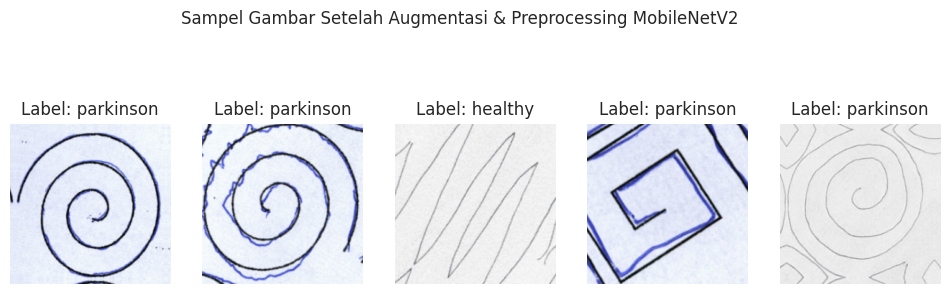

In [ ]:
for images, labels in train_ds_final.take(1):
    plt.figure(figsize=(12, 4))
    for i in range(min(5, BATCH_SIZE)):
        ax = plt.subplot(1, 5, i + 1)
        img_display = (images[i].numpy() + 1.0) / 2.0
        img_display = np.clip(img_display, 0, 1)
        plt.imshow(img_display)
        plt.title(f'Label: {class_names_from_tf[labels[i].numpy()]}')
        plt.axis('off')
    plt.suptitle("Sampel Gambar Setelah Augmentasi & Preprocessing MobileNetV2")
    plt.show()
    break